# Defunciones en Sonora

En esta libreta se analiza la información de Secretaría de Salud acerca de las defunciones en el Estado de Sonora, México.
El interés de este proyecto es visualizar las principales causas de muerte, así como su evolución en los últimos 22 años.

se importan las librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import zipfile
from zipfile import ZipFile

se lee el archivo previamente procesado, 
se juntan las fechas en una sola columna

In [2]:
df = pd.read_csv("archivos/datos_sonora.zip", index_col= False)
df.head()

,ENT_REGIS,MUN_REGIS,ENT_RESID,MUN_RESID,TLOC_RESID,ENT_OCURR,MUN_OCURR,TLOC_OCURR,CAUSA_DEF,LISTA_MEX,...,LENGUA,COND_ACT,PAR_AGRE,ENT_OCULES,MUN_OCULES,LOC_RESID,LOC_OCURR,LOC_OCULES,RAZON_M,LOC_OCUR
0,2,2,26,55,13,2,2,15.0,K859,35P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,26,55,13,2,2,15.0,I619,30B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,26,55,13,2,2,15.0,P229,46F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,26,55,13,2,2,15.0,P220,46F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,26,55,13,2,2,15.0,J440,33G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('renglones y columnas: ', df.shape)

renglones y columnas:  (331302, 62)


imprime las columnas

In [6]:
df.columns

Index(['ENT_REGIS', 'MUN_REGIS', 'ENT_RESID', 'MUN_RESID', 'TLOC_RESID',
       'ENT_OCURR', 'MUN_OCURR', 'TLOC_OCURR', 'CAUSA_DEF', 'LISTA_MEX',
       'SEXO', 'EDAD', 'DIA_OCURR', 'MES_OCURR', 'ANIO_OCUR', 'DIA_REGIS',
       'MES_REGIS', 'ANIO_REGIS', 'DIA_NACIM', 'MES_NACIM', 'ANIO_NACIM',
       'OCUPACION', 'ESCOLARIDA', 'EDO_CIVIL', 'PRESUNTO', 'OCURR_TRAB',
       'LUGAR_OCUR', 'NECROPSIA', 'ASIST_MEDI', 'SITIO_OCUR', 'COND_CERT',
       'NACIONALID', 'DERECHOHAB', 'EMBARAZO', 'REL_EMBA', 'HORAS', 'MINUTOS',
       'CAPITULO', 'GRUPO', 'LISTA1', 'GR_LISMEX', 'VIO_FAMI', 'AREA_UR',
       'EDAD_AGRU', 'COMPLICARO', 'DIA_CERT', 'MES_CERT', 'ANIO_CERT', 'PESO',
       'MATERNAS', 'DIS_RE_OAX', 'CERT_NOMED', 'LENGUA', 'COND_ACT',
       'PAR_AGRE', 'ENT_OCULES', 'MUN_OCULES', 'LOC_RESID', 'LOC_OCURR',
       'LOC_OCULES', 'RAZON_M', 'LOC_OCUR'],
      dtype='object')

se seleccionan las columnas de interés

In [7]:
df = df[['ANIO_OCUR', 'MES_OCURR', 'DIA_OCURR', 'MUN_RESID', 'SEXO', 'EDAD', 'GR_LISMEX']]

se cambia el nombre de las cabeceras

In [8]:
headers = ['año', 'mes', 'dia', 'municipio', 'genero', 'edad', 'causa']
df.columns = headers
df.head()

,año,mes,dia,municipio,genero,edad,causa
0,2007,2,22,55,2,4074,35
1,2007,2,14,55,1,4068,30
2,2007,2,10,55,1,1002,46
3,2007,2,4,55,2,2002,46
4,2007,2,24,55,1,4060,33


se requiere limpiar las ultimas 4 columnas

## limpieza de datos

In [9]:
df.dtypes

año           int64
mes           int64
dia           int64
municipio     int64
genero        int64
edad          int64
causa        object
dtype: object

falta corregir los valores de fecha

se buscan valores nulos

In [10]:
df.isnull().sum()

año          0
mes          0
dia          0
municipio    0
genero       0
edad         0
causa        0
dtype: int64

se buscan valores fuera de rango

In [11]:
print(df.año.min())
print(df.año.max())
df.año.unique()

1908
9999


array([2007, 2006, 2001, 1981, 2004, 1997, 1957, 2003, 2005, 1998, 1984,
       1929, 1931, 9999, 2002, 2000, 1988, 1995, 1990, 1982, 1996, 1975,
       1935, 1994, 1993, 1917, 1970, 1959, 1983, 1927, 1953, 2008, 1992,
       1989, 1999, 1940, 1985, 1920, 1938, 1928, 1986, 1942, 1962, 1954,
       1961, 1974, 1991, 1919, 1937, 1980, 1930, 1956, 1968, 1958, 1944,
       1945, 1979, 1939, 1946, 1978, 1977, 1912, 1933, 1948, 1987, 1955,
       1976, 1908, 1951, 1952, 1949, 2012, 2011, 1960, 2010, 2009, 2018,
       2017, 2015, 2013, 2016, 2014, 2019, 1910, 1915, 1967, 1941, 1969,
       1924, 1950, 1965, 1914, 1966, 1947, 1925, 1911, 2020])

se descubren valores del año que fuera de rango por lo que se reemplazan por 9999

In [14]:
df['año'].replace([df['año'].loc[(df.año < 1998)]], 9999, inplace= True)

In [15]:
#los iba a dejar pero causan mucho ruido
df.drop(df['año'].loc[(df.año > 2020)].index, inplace= True)

In [16]:
df['año'].unique()

array([2007, 2006, 2001, 2004, 2003, 2005, 1998, 2002, 2000, 2008, 1999,
       2012, 2011, 2010, 2009, 2018, 2017, 2015, 2013, 2016, 2014, 2019,
       2020])

In [17]:
print(df.mes.min())
print(df.mes.max())
df.mes.unique()

1
99


array([ 2,  3,  4,  1, 12,  5,  7,  6,  8,  9, 10, 11, 99])

In [18]:
df.drop(df['mes'].loc[(df.mes > 12)].index, inplace= True)

In [19]:
print(df.dia.min())
print(df.dia.max())
df.dia.unique()

1
99


array([22, 14, 10,  4, 24, 13, 19, 18, 30,  7, 16,  6,  1, 21, 28, 17, 15,
       27, 29,  9,  8, 31,  5, 20, 11,  3, 25, 26,  2, 12, 23, 99])

In [20]:
df.drop(df['dia'].loc[(df.dia > 31)].index, inplace= True)

se observan en el año valores fuera de rango, en mes y dia sólo los valores 99 que para la SSA significa NA

a partir de lo anterior se genera la columna fecha

In [23]:
df['fecha'] = df['año'].astype(str) + df['mes'].astype(str).str.zfill(2) + df['dia'].astype(str).str.zfill(2)
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y%m%d', errors='coerce')
df = df.sort_values('fecha')
df.dtypes

año                   int64
mes                   int64
dia                   int64
municipio             int64
genero                int64
edad                  int64
causa                object
fecha        datetime64[ns]
dtype: object

In [24]:
df.genero.unique()

array([2, 1, 9])

In [25]:
df.drop(df['genero'].loc[(df.genero == 9)].index, inplace= True)
genero = {1: 'hombre', 2: 'mujer'}
df.genero = [genero[item] for item in df.genero]
df.head()

,año,mes,dia,municipio,genero,edad,causa,fecha
59978,1998,1,1,30,mujer,4077,33,1998-01-01
60130,1998,1,1,33,hombre,4029,E55,1998-01-01
59662,1998,1,1,39,hombre,4019,E49,1998-01-01
59446,1998,1,1,18,mujer,4056,20,1998-01-01
60166,1998,1,1,40,hombre,4071,28,1998-01-01


se corrigen los valores para la edad

In [26]:
df.edad.unique()

array([4077, 4029, 4019, 4056, 4071, 4038, 4060, 4069, 4015, 4047, 4080,
       3004, 3002, 4085, 4023, 4089, 4081, 4079, 4061, 4020, 4075, 4070,
       4063, 4082, 2001, 4017, 4093, 4039, 4058, 2005, 3001, 4066, 4030,
       4065, 4041, 4051, 4083, 4037, 4054, 4064, 4062, 4084, 4068, 4067,
       4036, 4087, 4074, 4072, 4018, 4049, 4005, 4098, 4022, 4059, 4044,
       4042, 4090, 4034, 4092, 4095, 4050, 4076, 4053, 2002, 2004, 1003,
       4046, 3011, 4086, 2006, 4097, 4031, 4101, 4078, 4057, 4014, 3003,
       4032, 4055, 3005, 4052, 4073, 4002, 4091, 4001, 4004, 4094, 1097,
       4045, 4088, 4033, 4035, 4040, 4096, 4043, 4998, 4021, 4027, 4024,
       4048, 4026, 4003, 2009, 4008, 4016, 2003, 4010, 4011, 4102, 3009,
       3007, 2017, 1009, 1004, 2010, 4025, 4100, 1001, 4099, 2028, 3008,
       4028, 2016, 3006, 2012, 2013, 4012, 1008, 2015, 1005, 4009, 4108,
       1002, 2007, 4006, 4007, 1020, 1023, 1012, 1010, 1098, 1017, 4013,
       2025, 3010, 4114, 2021, 2008, 1018, 1019, 10

In [27]:
df.drop(df['edad'].loc[(df.edad == 4998)].index, inplace= True)
df.loc[df.edad < 4000, 'edad'] = 0
df['edad'] = df['edad'].astype(str)
df['edad'] = df['edad'].str.lstrip('4')
df['edad'] = df['edad'].astype(float)
df.edad.unique()

array([ 77.,  29.,  19.,  56.,  71.,  38.,  60.,  69.,  15.,  47.,  80.,
         0.,  85.,  23.,  89.,  81.,  79.,  61.,  20.,  75.,  70.,  63.,
        82.,  17.,  93.,  39.,  58.,  66.,  30.,  65.,  41.,  51.,  83.,
        37.,  54.,  64.,  62.,  84.,  68.,  67.,  36.,  87.,  74.,  72.,
        18.,  49.,   5.,  98.,  22.,  59.,  44.,  42.,  90.,  34.,  92.,
        95.,  50.,  76.,  53.,  46.,  86.,  97.,  31., 101.,  78.,  57.,
        14.,  32.,  55.,  52.,  73.,   2.,  91.,   1.,   4.,  94.,  45.,
        88.,  33.,  35.,  40.,  96.,  43.,  21.,  27.,  24.,  48.,  26.,
         3.,   8.,  16.,  10.,  11., 102.,  25., 100.,  99.,  28.,  12.,
         9., 108.,   6.,   7.,  13., 114., 103., 104., 113., 120., 107.,
       110., 115., 106., 109., 112., 105., 116., 111.])

se corrige la columna causas de muerte

In [29]:
df['causa'].unique()

array([' 33', 'E55', 'E49', ' 20', ' 28', ' 30', ' 10', ' 47', ' 48',
       ' 37', ' 35', 'E50', ' 11', ' 02', ' 46', 'E54', ' 29', ' 12',
       ' 01', ' 09', 'E53', ' 31', 'E51', ' 38', ' 27', ' 21', ' 23',
       ' 06', 'E52', ' 22', ' 03', ' 14', ' 19', ' 18', ' 13', ' 36',
       ' 15', ' 05', ' 32', 'E56', ' 08', ' 43', ' 26', ' 39', ' 24',
       ' 17', 'E59', ' 41', 'E57', ' 07', ' 04', ' 45', ' 34', 'E58',
       ' 25', '35', ' 40', ' 16', '48', '11', '20', '28', '33', '10',
       '30', '23', '18', '39', '36', '29', '13', '27', '12', '08', '09',
       '14', '01', '17', '38', '19', '06', '22', '03', '47', '45', '37',
       '26', '41', '02', '46', '05', '21', '31', '07', '43', '25', '24',
       '32', '04', '34', '40', '16', '3', '9', '1', '2', '8', '6', '5',
       '7', '4'], dtype=object)

se observan algunas valores repetidos porque tienen espacio o cero a la izquierda

In [30]:
df['causa'] = df['causa'].str.lstrip()
df['causa'] = df['causa'].str.lstrip('0')
df['causa'].unique()

array(['33', 'E55', 'E49', '20', '28', '30', '10', '47', '48', '37', '35',
       'E50', '11', '2', '46', 'E54', '29', '12', '1', '9', 'E53', '31',
       'E51', '38', '27', '21', '23', '6', 'E52', '22', '3', '14', '19',
       '18', '13', '36', '15', '5', '32', 'E56', '8', '43', '26', '39',
       '24', '17', 'E59', '41', 'E57', '7', '4', '45', '34', 'E58', '25',
       '40', '16'], dtype=object)

## transformación de los datos

se transforman las columnas municipios y causas para poder leerlas

se lee el archivo con la lista de municipios

In [31]:
municipios = pd.read_csv('archivos/municipios.csv', index_col=False)
municipios = municipios.loc[municipios['ID_ENTIDAD'] == 26].drop(['ID_ENTIDAD'], axis=1)

se itera sobre la columna para mostrar el nombre del municipio

In [32]:
df['municipio'] = df['municipio'].map(municipios.set_index('ID_MUNICIPIO')['NOM_MUNICIPIO'])

In [33]:
df.head()

,año,mes,dia,municipio,genero,edad,causa,fecha
59978,1998,1,1,Hermosillo,mujer,77.0,33,1998-01-01
60130,1998,1,1,Huatabampo,hombre,29.0,E55,1998-01-01
59662,1998,1,1,Naco,hombre,19.0,E49,1998-01-01
59446,1998,1,1,Cajeme,mujer,56.0,20,1998-01-01
60166,1998,1,1,Nácori Chico,hombre,71.0,28,1998-01-01


se lee el archivo con la lista de causas de muerte y se itera sobre la columna causa

In [34]:
causas = pd.read_csv('archivos/grupo_lista_mexicana.csv', encoding='iso-8859-3')
df['causa'] = df['causa'].map(causas.set_index('CVE')['DESCRIP'])

In [35]:
df.head()

,año,mes,dia,municipio,genero,edad,causa,fecha
59978,1998,1,1,Hermosillo,mujer,77.0,Otras enfermedades del aparato respiratorio,1998-01-01
60130,1998,1,1,Huatabampo,hombre,29.0,Agresiones,1998-01-01
59662,1998,1,1,Naco,hombre,19.0,Accidentes de transporte,1998-01-01
59446,1998,1,1,Cajeme,mujer,56.0,Enfermedades endocrinas y metabólicas,1998-01-01
60166,1998,1,1,Nácori Chico,hombre,71.0,Enfermedades isquémicas del corazón,1998-01-01


se puede leer la columna causa

se cuentan las diferentes causas de muerte

In [36]:
df['causa'].value_counts().count()

57

In [37]:
df['causa'].value_counts()

Enfermedades isquémicas del corazón                                                                                            54506
Enfermedades endocrinas y metabólicas                                                                                          38990
Otras enfermedades del aparato respiratorio                                                                                    28832
Enfermedades de otras partes del aparato digestivo                                                                             21407
Enfermedades cerebrovasculares                                                                                                 15612
Tumores malignos de los órganos digestivos                                                                                     13453
Accidentes de transporte                                                                                                       11457
Agresiones                                                           

se revisa si existen valores faltantes después de la transformación

In [38]:
df.isnull().sum()

año          0
mes          0
dia          0
municipio    0
genero       0
edad         0
causa        0
fecha        6
dtype: int64

<AxesSubplot:>

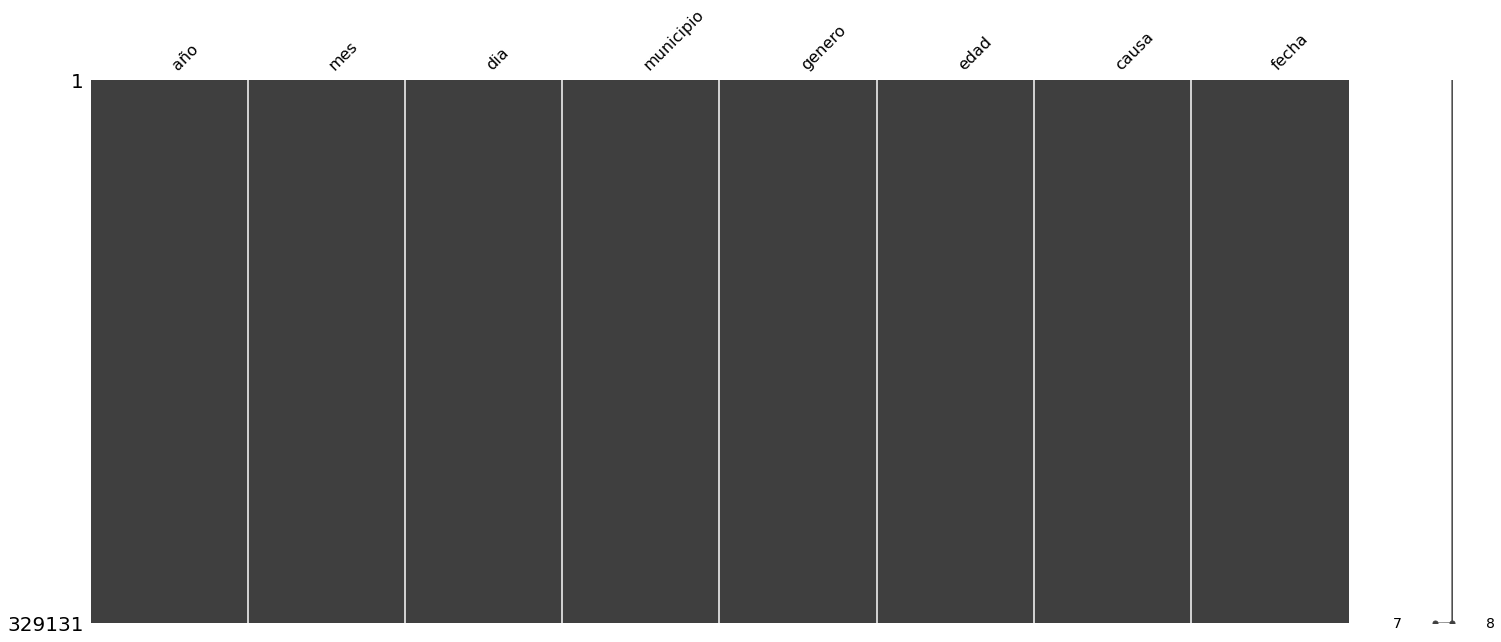

In [39]:
msno.matrix(df)

## visualización de resultados

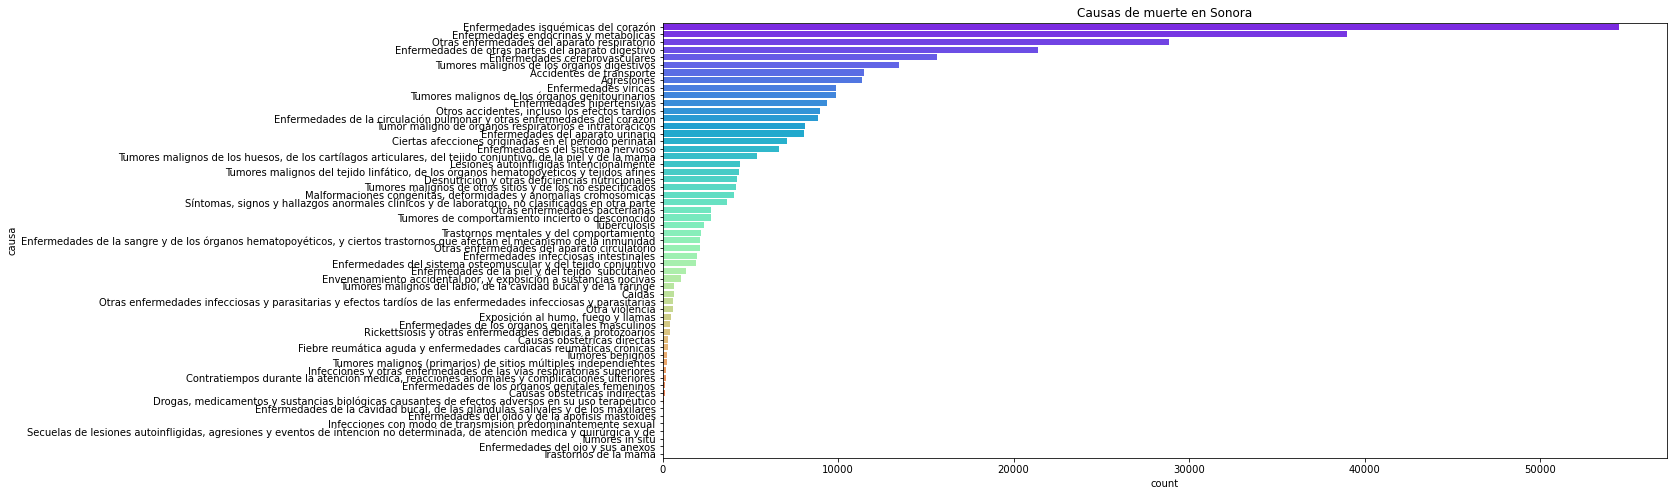

In [40]:
plt.figure(figsize=(18,8))
sns.countplot(y='causa',data=df, palette='rainbow', order = df['causa'].value_counts().index)
plt.title("Causas de muerte en Sonora")
plt.show()

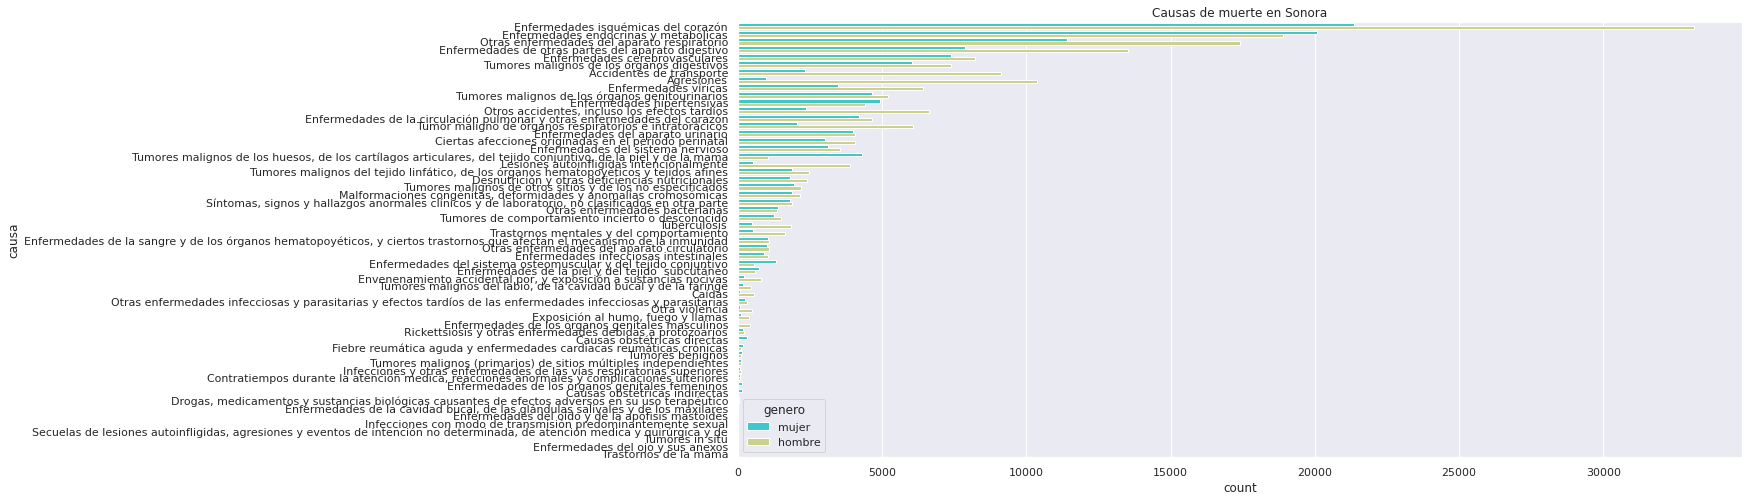

In [41]:
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
sns.countplot(y='causa',data=df, palette='rainbow', hue = 'genero', order = df['causa'].value_counts().index)
plt.title("Causas de muerte en Sonora")
plt.show()

In [45]:
principales = df['causa'].value_counts()[df['causa'].value_counts() > 5000]

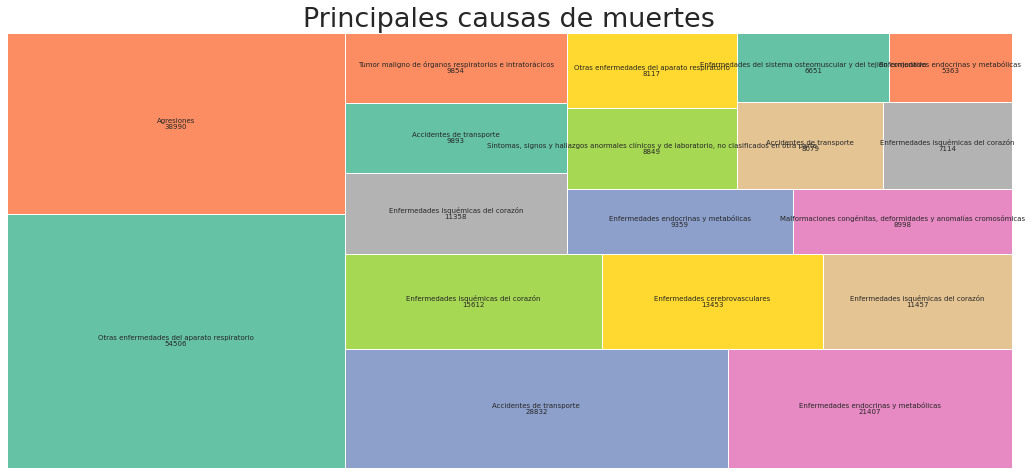

In [46]:
import squarify
import matplotlib
plt.figure(figsize=(18,8))
squarify.plot(sizes=principales, label= df.causa, value= principales,
              color=[matplotlib.cm.Set2(i) for i in range(8)],
              text_kwargs={'fontsize': 7}, pad = False)
plt.title('Principales causas de muertes', fontsize=27)
plt.axis('off')
plt.show()

se exporta el archivo para realizar un tablero con tableau

In [47]:
df.to_csv('archivos/datos_sonora_def.csv', index = False)
# Se comprimen los resultados
with ZipFile('archivos/datos_sonora_def.zip', 'w') as zip:
    zip.write('archivos/datos_sonora_def.csv', compress_type = zipfile.ZIP_DEFLATED)
print('Se exportó el archivo')

Se exportó el archivo
